## InfoPillar Solution Pvt Ltd
## IPS Remote Internship
## Task 3: Iris Flowers Classification Project
## AUTHOR : POOJA SHARMA
Dataset:https://archive.ics.uci.edu/ml/datasets/Iris<br>
Importing required libraries

In [ ]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
#Read the dataset file of iris data
data=pd.read_csv("iris.data")

In [ ]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [ ]:
data.shape

(149, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.value_counts

<bound method DataFrame.value_counts of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]>

In [ ]:
data.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [ ]:
# to display no. of samples on each class
data['Iris-setosa'].value_counts() 

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

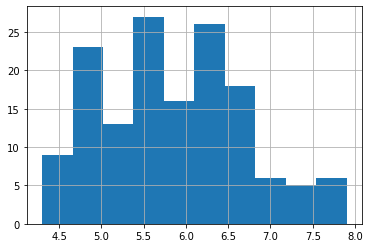

In [ ]:
# histograms
data['5.1'].hist()

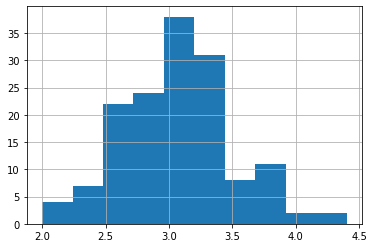

In [ ]:
# histograms
data['3.5'].hist()

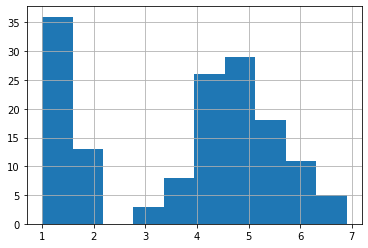

In [ ]:
# histograms
data['1.4'].hist()

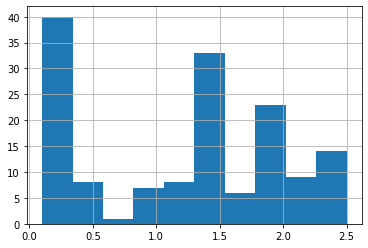

In [ ]:
# histograms
data['0.2'].hist()

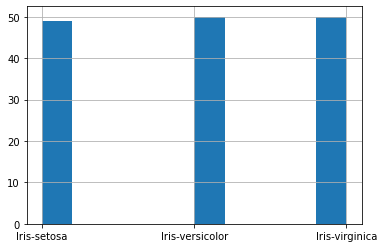

In [ ]:
# histograms
data['Iris-setosa'].hist()

In [ ]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

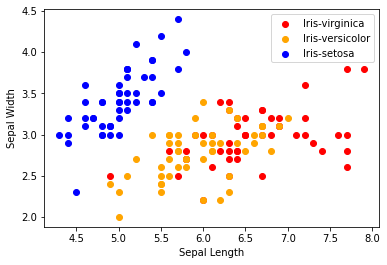

In [ ]:
for i in range(3):
    x = data[data['Iris-setosa'] == species[i]]
    plt.scatter(x['5.1'], x['3.5'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

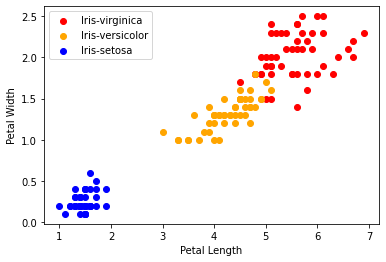

In [ ]:
for i in range(3):
    x = data[data['Iris-setosa'] == species[i]]
    plt.scatter(x['1.4'], x['0.2'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

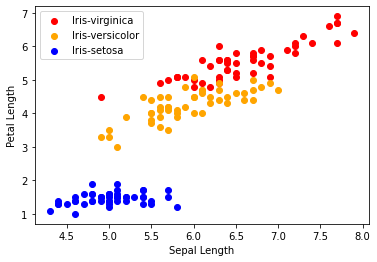

In [ ]:
for i in range(3):
    x = data[data['Iris-setosa'] == species[i]]
    plt.scatter(x['5.1'], x['1.4'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

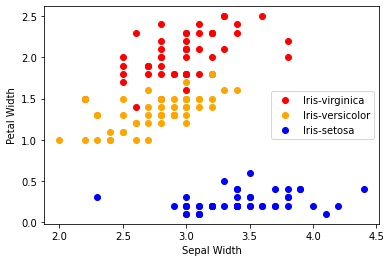

In [ ]:
for i in range(3):
    x = data[data['Iris-setosa'] == species[i]]
    plt.scatter(x['3.5'], x['0.2'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
data.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,-0.103784,0.871283,0.816971
3.5,-0.103784,1.000000,-0.415218,-0.350733
1.4,0.871283,-0.415218,1.000000,0.962314
0.2,0.816971,-0.350733,0.962314,1.000000


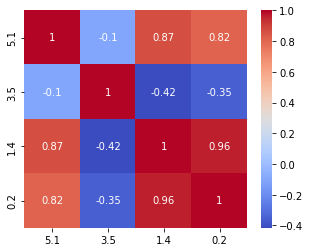

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Iris-setosa'] = le.fit_transform(data['Iris-setosa'])
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Iris-setosa'])
Y = data['Iris-setosa']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
